In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

### Interval estimation for exponential distribution

The probability density function for the exponential distribution is given by:

$$
f(y;\lambda) = \lambda e^{-\lambda y}
$$

The likelihood function, $( L(\lambda) )$, is computed as:

\begin{align*}
L(\lambda) &= \prod_{i=1}^{n} \lambda e^{-\lambda y_{i}} \\
&= \lambda^{n} e^{-\lambda \sum_{i=1}^{n} y_{i}} \\
&= \lambda^{n} e^{-\lambda n\bar{Y}}
\end{align*}

where $( \bar{Y} )$ denotes the sample mean.

The estimator for $( \lambda )$, denoted as $( \hat{\lambda} )$, can be obtained as (MLE):

$$
\hat{\lambda} = \frac{1}{\bar{Y}}
$$


In [2]:
def L(ld, mean, n):
    res = ld**n * math.exp(-ld*n*mean)
    return res

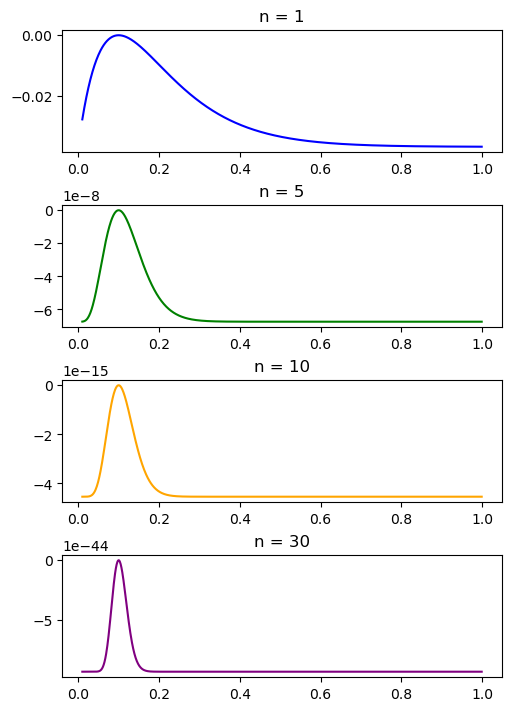

In [3]:
sample_size = [1, 5, 10, 30]
ld_array = np.arange(0.01, 1.00, 0.001)
cl = ['blue', 'green', 'orange', 'purple']
mean = 10

fig, axs = plt.subplots(4, constrained_layout = True, figsize = (5, 7))
for i, n in enumerate(sample_size): 
    y = []
    for ld in ld_array:
        y.append(L(ld, mean, n) - L(1 / mean, mean, n))
    axs[i].set_title(f"n = {n}")
    axs[i].plot(ld_array, y, color = cl[i])

- As $n$ increases, the peak of the curve of the function $L(\lambda)$ gets closer and closer to 0.1, and the curve becomes sharper at its peak
- As the log-likelihood narrowed, it implied that the MLE for the parameter becomes more precise, since there's less variation and the likelihood of the estimator increases

Fisher Information: $I(\lambda) = \frac{n}{\lambda^{2}}$

Pivotal statistics: T = $ \sqrt{I(\hat{\lambda})} (\hat{\lambda} - \lambda)$

$ \sqrt{I(\hat{\lambda})} (\hat{\lambda} - \lambda)$ follows $N(0, 1)$ asymptotically.

$ P(-Z_{0.025} \le \sqrt{I(\hat{\lambda})} (\hat{\lambda} - \lambda) \le Z_{0.025}) = 0.95 $

$95$% CI: $[\hat{\lambda} \pm Z_{0.025} \frac{\hat{\lambda}}{\sqrt{n}}]$

In [4]:
Z = 1.96
CI = []
for n in sample_size:
    error = Z * (1 / mean) / math.sqrt(n)
    CI.append([round(1/mean - error, 8), round(1/mean + error, 8)])
CI

[[-0.096, 0.296],
 [0.01234614, 0.18765386],
 [0.03801936, 0.16198064],
 [0.06421546, 0.13578454]]

Observation: As sample size increases, the confidence interval becomes narrower

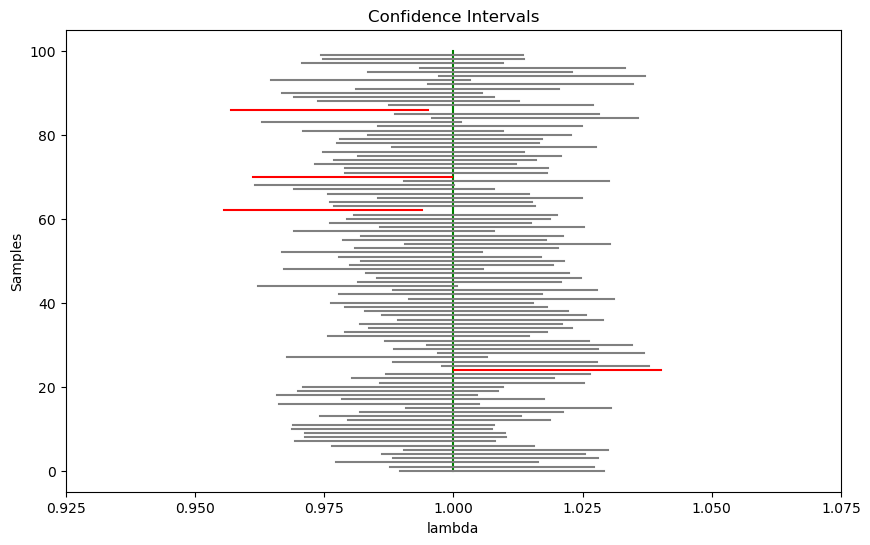

In [5]:
ld_0 = 1
n = 10000
x_min = 0.925
x_max = 1.075

plt.figure(figsize = (10, 6))
plt.title("Confidence Intervals")
plt.xticks(np.arange(x_min, x_max + 0.0001, 0.025))
plt.xlabel("lambda")
plt.yticks(np.arange(0, 101, 20))
plt.ylabel("Samples")
plt.ylim(-5, 105)
plt.xlim(x_min, x_max)
plt.axvline(1, ymin = 5 / 110, ymax = 105 / 110, color = "green")

for i in range(100):
    sample = np.random.exponential(scale = ld_0, size = n)
    mean = sum(sample) / n
    error = Z * (1 / mean) / math.sqrt(n)
    CI = (1/mean - error, 1/mean + error)
    if CI[0] > 1 or CI[1] < 1:
        plt.axhline(y = i, xmin = (CI[0] - x_min) / (x_max - x_min), xmax = (CI[1] - x_min) / (x_max - x_min), color = 'red')
    else:
        plt.axhline(y = i, xmin = (CI[0] - x_min) / (x_max - x_min), xmax = (CI[1] - x_min) / (x_max - x_min), color = 'grey')
    
plt.show()

Simulation: create 100 95% CI from data. 95/100 CI are expected to contain the true value.